In [ ]:
import requests
import json
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

username = 'Ephraim.klestzick@rossilabs.com'
password = '#nieceFULL40#'
server_name = 'https://chesapeake.sisense.com/'

login_data =    {  'username' : username,
                        'password' : password
                    }

login_url = server_name + '/api/v1/authentication/login'
login_res = requests.post(url=login_url, data=login_data).json()

access_token = login_res.get('access_token')
if len(access_token) > 0:
    print('login succesful.')

api_header = {'Authorization': 'Bearer ' + access_token}

url = server_name + '/api/v1/users?'

urlSQL = server_name + '/api/datasources/ML_Project/sql?count=-1&includeMetadata=true&query=select%20%2A%20from%20ML_Features'

response = requests.get(urlSQL, headers=api_header)
if response.status_code == 404:
    print("Error: API endpoint not found.")

response_data = json.loads(response.text)
print(json.loads(response.text))

login succesful.
{'headers': ['Month', 'AverageDaysToStart', 'AverageDaysToComplete', 'Month1', 'TotalRevenue', 'VolumeHousingRevenuePct', 'CustomHousingRevenuePct', 'CommercialRevenuePct', 'Division1RevenuePct', 'Division2RevenuePct', 'Division3RevenuePct', 'UnderslabRevenuePct', 'Division1UnderslabRevenuePct', 'Division2UnderslabRevenuePct', 'Division3UnderslabRevenuePct', 'VolumeHousingUnderslabRevenuePct', 'CustomHousingUnderslabRevenuePct', 'CommercialUnderslabRevenuePct', 'RyanUnderslabRevenuePct', 'LennarUnderslabRevenuePct', 'BlenheimUnderslabRevenuePct', 'InsightUnderslabRevenuePct', 'SchellUnderslabRevenuePct', 'RoughRevenuePct', 'Division1RoughRevenuePct', 'Division2RoughRevenuePct', 'Division3RoughRevenuePct', 'VolumeHousingRoughRevenuePct', 'CustomHousingRoughRevenuePct', 'CommercialRoughRevenuePct', 'RyanRoughRevenuePct', 'LennarRoughRevenuePct', 'BlenheimRoughRevenuePct', 'InsightRoughRevenuePct', 'SchellRoughRevenuePct', 'TrimRevenuePct', 'Division1TrimRevenuePct', 'Div

In [ ]:
import pandas as pd
headers = response_data['headers']
values = response_data['values']

# Create a DataFrame using pandas
df = pd.DataFrame(values, columns=headers)
df.head()

,Month,AverageDaysToStart,AverageDaysToComplete,Month1,TotalRevenue,VolumeHousingRevenuePct,CustomHousingRevenuePct,CommercialRevenuePct,Division1RevenuePct,Division2RevenuePct,...,LennarJobsEnded,BlenheimJobsEnded,InsightJobsEnded,SchellJobsEnded,JobTransactions,Underslab,Rough,Trim,SW,TargetRev
0,2020-01,44,72,2020-01,3177763.15,83.0098,6.4619,10.1909,39.3230,24.4011,...,5,0,2,0,1639,86,317,452,598,3177763.15
1,2020-02,41,93,2020-02,2987775.71,76.9019,7.4507,13.1039,41.1471,24.4143,...,4,0,0,0,1598,92,243,561,560,2987775.71
2,2020-03,35,95,2020-03,3638932.50,75.9423,2.3042,11.8602,42.2578,16.2077,...,7,2,0,1,1729,88,275,566,565,3638932.50
3,2020-04,36,88,2020-04,3787317.34,63.1031,4.8614,22.3061,41.1051,21.3262,...,19,1,3,0,1688,118,203,521,597,3787317.34
4,2020-05,28,100,2020-05,3326118.62,62.4388,7.3200,11.8653,49.6882,20.3725,...,23,1,29,2,1782,79,316,497,555,3326118.62


In [ ]:
df.columns

Index(['Month', 'AverageDaysToStart', 'AverageDaysToComplete', 'Month1',
       'TotalRevenue', 'VolumeHousingRevenuePct', 'CustomHousingRevenuePct',
       'CommercialRevenuePct', 'Division1RevenuePct', 'Division2RevenuePct',
       'Division3RevenuePct', 'UnderslabRevenuePct',
       'Division1UnderslabRevenuePct', 'Division2UnderslabRevenuePct',
       'Division3UnderslabRevenuePct', 'VolumeHousingUnderslabRevenuePct',
       'CustomHousingUnderslabRevenuePct', 'CommercialUnderslabRevenuePct',
       'RyanUnderslabRevenuePct', 'LennarUnderslabRevenuePct',
       'BlenheimUnderslabRevenuePct', 'InsightUnderslabRevenuePct',
       'SchellUnderslabRevenuePct', 'RoughRevenuePct',
       'Division1RoughRevenuePct', 'Division2RoughRevenuePct',
       'Division3RoughRevenuePct', 'VolumeHousingRoughRevenuePct',
       'CustomHousingRoughRevenuePct', 'CommercialRoughRevenuePct',
       'RyanRoughRevenuePct', 'LennarRoughRevenuePct',
       'BlenheimRoughRevenuePct', 'InsightRoughRevenuePct',

In [ ]:
#data wrangling
# df.set_index(df.columns[0], inplace=True)
df.reset_index(inplace=True)
df.drop(['TotalRevenue'], axis=1,inplace=True)

df.drop(['Month2'], axis=1,inplace=True)
df.drop(['Month1'], axis=1,inplace=True)
df.drop(['Month'], axis=1,inplace=True)
df.head()


,index,AverageDaysToStart,AverageDaysToComplete,VolumeHousingRevenuePct,CustomHousingRevenuePct,CommercialRevenuePct,Division1RevenuePct,Division2RevenuePct,Division3RevenuePct,UnderslabRevenuePct,...,LennarJobsEnded,BlenheimJobsEnded,InsightJobsEnded,SchellJobsEnded,JobTransactions,Underslab,Rough,Trim,SW,TargetRev
0,0,44,72,83.0098,6.4619,10.1909,39.3230,24.4011,23.2563,9.2747,...,5,0,2,0,1639,86,317,452,598,3177763.15
1,1,41,93,76.9019,7.4507,13.1039,41.1471,24.4143,20.3337,6.7790,...,4,0,0,0,1598,92,243,561,560,2987775.71
2,2,35,95,75.9423,2.3042,11.8602,42.2578,16.2077,22.1154,9.7300,...,7,2,0,1,1729,88,275,566,565,3638932.50
3,3,36,88,63.1031,4.8614,22.3061,41.1051,21.3262,28.3258,6.7315,...,19,1,3,0,1688,118,203,521,597,3787317.34
4,4,28,100,62.4388,7.3200,11.8653,49.6882,20.3725,17.7469,7.2937,...,23,1,29,2,1782,79,316,497,555,3326118.62


In [ ]:
def min_max_scale(dataframe):
    """ Applies MinMax Scaling

        Wrapper for sklearn's MinMaxScaler class.
    """
    mm = MinMaxScaler()
    return mm.fit_transform(dataframe)

In [ ]:
def split_data(series, train_fraq, test_len=6):
    """Splits input series into train, val and test.

        Default to 1 year of test data.
    """
    #slice the last year of data for testing 1 year has 8760 hours
    test_slice = len(series)-test_len

    test_data = series[test_slice:]
    train_val_data = series[:test_slice]

    #make train and validation from the remaining
    train_size = int(len(train_val_data) * train_fraq)

    train_data = train_val_data[:train_size]
    val_data = train_val_data[train_size:]

    return train_data, val_data, test_data





#scale
# multivar_df = min_max_scale(df)
train_multi, val_multi, test_multi = split_data(df, train_fraq=0.65, test_len=13)

train_multi.astype("float32")
print("Multivarate Datasets")
print(f"Train Data Shape: {train_multi.shape}")
print(f"Val Data Shape: {val_multi.shape}")
print(f"Test Data Shape: {test_multi.shape}")
print(f"Nulls In Train {np.any(np.isnan(train_multi))}")
print(f"Nulls In Validation {np.any(np.isnan(val_multi))}")
print(f"Nulls In Test {np.any(np.isnan(test_multi))}")


Multivarate Datasets
Train Data Shape: (22, 87)
Val Data Shape: (13, 87)
Test Data Shape: (13, 87)
Nulls In Train False
Nulls In Validation False
Nulls In Test False


In [ ]:
def window_dataset(data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=False, expand_dims=False):
    """ Create a windowed tensorflow dataset

    """

    #create a window with n steps back plus the size of the prediction length
    window = n_steps

    #expand dimensions to 3D to fit with LSTM inputs
    #creat the inital tensor dataset
    if expand_dims:
        ds = tf.expand_dims(data, axis=-1)
        ds = tf.data.Dataset.from_tensor_slices(ds)
    else:
        ds = tf.data.Dataset.from_tensor_slices(data)

    #create the window function shifting the data by the prediction length
    ds = ds.window(window, shift=n_horizon, drop_remainder=True)

    #flatten the dataset and batch into the window size
    ds = ds.flat_map(lambda x : x.batch(window))
    ds = ds.shuffle(shuffle_buffer)

    #create the supervised learning problem x and y and batch
    if multi_var:
        ds = ds.map(lambda x : (x[:, :-1], x[:, -1:]))
    else:
        ds = ds.map(lambda x : (x[:-n_horizon], x[-n_horizon:]))

    ds = ds.batch(batch_size).prefetch(1)

    return ds



n_steps = 10
n_horizon = 1
batch_size = 1
shuffle_buffer = 5
expand_dims=False




In [ ]:
train_ds = window_dataset(train_multi, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=True,expand_dims=expand_dims)
val_ds = window_dataset(val_multi, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=True, expand_dims=expand_dims)
test_ds = window_dataset(test_multi, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=True,expand_dims=expand_dims )



print('Example sample shapes')
for idx,(x,y) in enumerate(test_ds):
    print("x = ", x.numpy().shape)
    print("y = ", y.numpy().shape)
    break
print(test_ds)
for idx,(x,y) in enumerate(test_ds):

    print("y = ", y)
    break

Example sample shapes
x =  (1, 10, 86)
y =  (1, 10, 1)
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 86), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
y =  tf.Tensor(
[[[4086065.07]
  [4987706.01]
  [4203090.67]
  [4376410.9 ]
  [4642778.75]
  [3868889.66]
  [4441649.36]
  [3989358.05]
  [4497625.1 ]
  [3750360.13]]], shape=(1, 10, 1), dtype=float64)


In [ ]:
def get_params(multivar=False):
    lr = .1
    n_steps=10
    n_horizon=1
    if multivar:
        n_features=86
    else:
        n_features=1

    return n_steps, n_horizon, n_features, lr

model_configs = dict()

def cfg_model_run(model, history, test_ds):
    return {"model": model, "history" : history, "test_ds": test_ds}


def run_model(model_name, model_func, model_configs, epochs):

    n_steps, n_horizon, n_features, lr = get_params(multivar=True)


    model = model_func(n_steps, n_horizon, n_features, lr=lr)

    model_hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

    model_configs[model_name] = cfg_model_run(model, model_hist, test_ds)
    return test_ds

In [ ]:
# def dnn_model(n_steps, n_horizon, n_features, lr):
#     tf.keras.backend.clear_session()

#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Flatten(input_shape=(n_steps, n_features),kernel_regularizer=tf.keras.regularizers.l2(0.1)),
#         tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
#         tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
#         tf.keras.layers.Dense(n_horizon)
#     ], name='dnn')

#     loss=tf.keras.losses.Huber()
#     optimizer = tf.keras.optimizers.Adam(lr=lr)

#     model.compile(loss=loss, optimizer='adam', metrics=['mae'])

#     return model


# dnn = dnn_model(n_steps=10,lr = 3e-4,n_features=86,n_horizon=1)


# dnn.summary()

In [ ]:
def cnn_model(n_steps, n_horizon, n_features, lr=3e-3):

    tf.keras.backend.clear_session()

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(512, kernel_size=6, activation='relu', input_shape=(n_steps,n_features),kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        # tf.keras.layers.Conv1D(256, kernel_size=6, activation='relu'),
        tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu'),
        # tf.keras.layers.MaxPooling1D(1),
        tf.keras.layers.LSTM(144, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(72, activation='relu', return_sequences=True),

        # tf.keras.layers.MaxPooling1D(1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name="CNN")

    loss= tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)

    model.compile(loss=loss, optimizer='adam', metrics=['mae'])

    return model

cnn = cnn_model(*get_params(multivar=True))
cnn.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 512)            264704    
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 256)            393472    
                                                                 
 lstm (LSTM)                 (None, 3, 144)            230976    
                                                                 
 lstm_1 (LSTM)               (None, 3, 72)             62496     
                                                                 
 flatten (Flatten)           (None, 216)               0         
                                                                 
 dropout (Dropout)           (None, 216)               0         
                                                                 
 dense (Dense)               (None, 128)               27776   

In [ ]:
def lstm_model(n_steps, n_horizon, n_features, lr):

    tf.keras.backend.clear_session()

    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(72, activation='relu', input_shape=(n_steps, n_features), return_sequences=True),
        tf.keras.layers.LSTM(48, activation='relu', return_sequences=False),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name='lstm')

    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)

    model.compile(loss=loss, optimizer='adam', metrics=['mae'])

    return model

lstm = lstm_model(*get_params(multivar=True))
lstm.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 72)            45792     
                                                                 
 lstm_1 (LSTM)               (None, 48)                23232     
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 128)               6272      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129    

In [ ]:
def lstm_cnn_model(n_steps, n_horizon, n_features, lr):

    tf.keras.backend.clear_session()

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64, kernel_size=6, activation='relu', input_shape=(n_steps,n_features)),
        tf.keras.layers.MaxPooling1D(1),
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(1),
        tf.keras.layers.LSTM(72, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(48, activation='relu', return_sequences=False),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name="lstm_cnn")

    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)

    model.compile(loss=loss, optimizer='adam', metrics=['mae'])

    return model

lstm_cnn = lstm_cnn_model(*get_params(multivar=True))
lstm_cnn.summary()

Model: "lstm_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             33088     
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 64)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             12352     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 3, 64)             0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 3, 72)             39456     
                                                                 
 lstm_1 (LSTM)               (None, 48)                232

In [ ]:
model_configs=dict()
# run_model("dnn", dnn_model, model_configs, epochs=1500)
run_model("cnn", cnn_model, model_configs, epochs=150)
# run_model("lstm", lstm_model, model_configs, epochs=150)
# run_model("lstm_cnn", lstm_cnn_model, model_configs, epochs=150)


Epoch 1/150
13/13 [==============================] - 4s 63ms/step - loss: 4216365.5000 - mae: 4216364.5000 - val_loss: 5097750.5000 - val_mae: 5097750.0000
Epoch 2/150
13/13 [==============================] - 0s 19ms/step - loss: 4201870.0000 - mae: 4201869.0000 - val_loss: 5043978.5000 - val_mae: 5043978.0000
Epoch 3/150
13/13 [==============================] - 0s 21ms/step - loss: 4104437.0000 - mae: 4104436.2500 - val_loss: 4880876.0000 - val_mae: 4880875.5000
Epoch 4/150
13/13 [==============================] - 0s 20ms/step - loss: 3833888.2500 - mae: 3833887.7500 - val_loss: 4399238.5000 - val_mae: 4399238.5000
Epoch 5/150
13/13 [==============================] - 0s 20ms/step - loss: 3039137.7500 - mae: 3039137.0000 - val_loss: 3150369.0000 - val_mae: 3150368.0000
Epoch 6/150
13/13 [==============================] - 0s 23ms/step - loss: 1316973.8750 - mae: 1316972.7500 - val_loss: 497920.0625 - val_mae: 497918.8125
Epoch 7/150
13/13 [==============================] - 0s 24ms/step 

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 86), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

Loss Curves


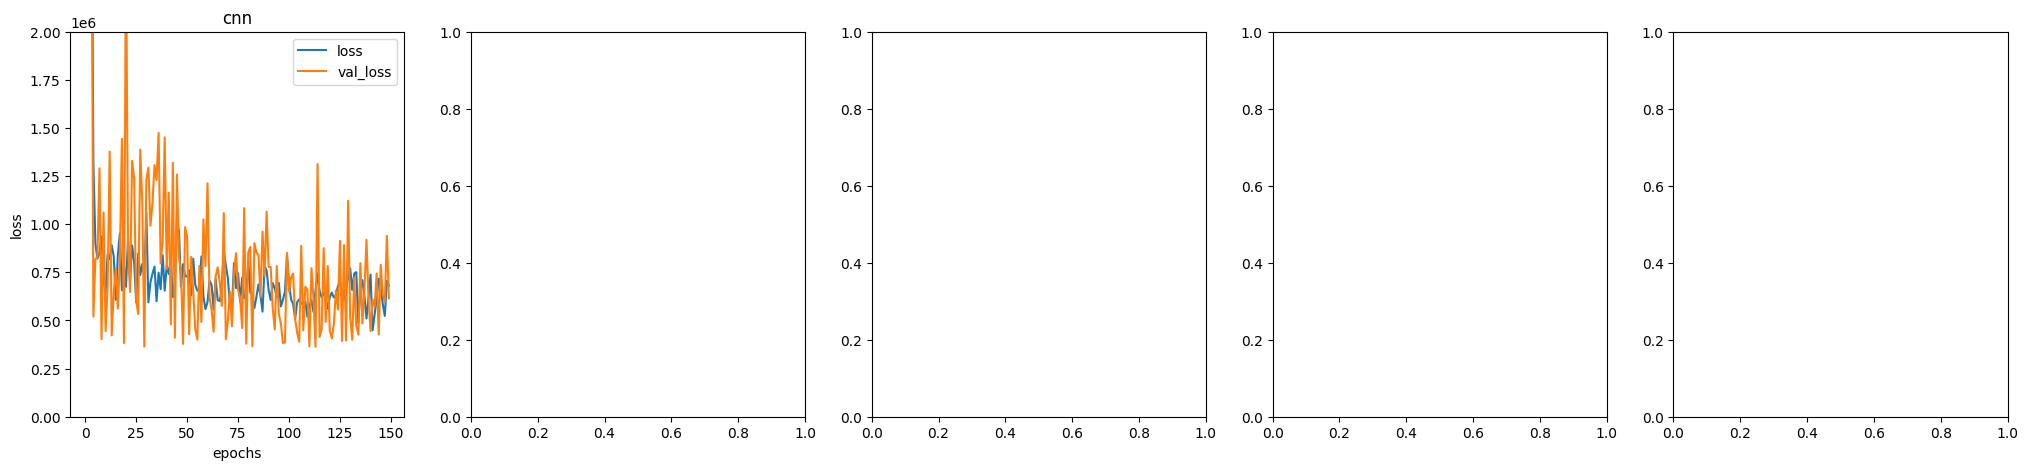

In [ ]:
legend = list()

fig, axs = plt.subplots(1, 5, figsize=(25,5))

def plot_graphs(metric, val, ax, upper):
    ax.plot(val['history'].history[metric])
    ax.plot(val['history'].history[f'val_{metric}'])
    ax.set_title(key)
    ax.legend([metric, f"val_{metric}"])
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.set_ylim([0, upper])

for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('loss', val, ax, 2000000)
print("Loss Curves")

Loss Curves


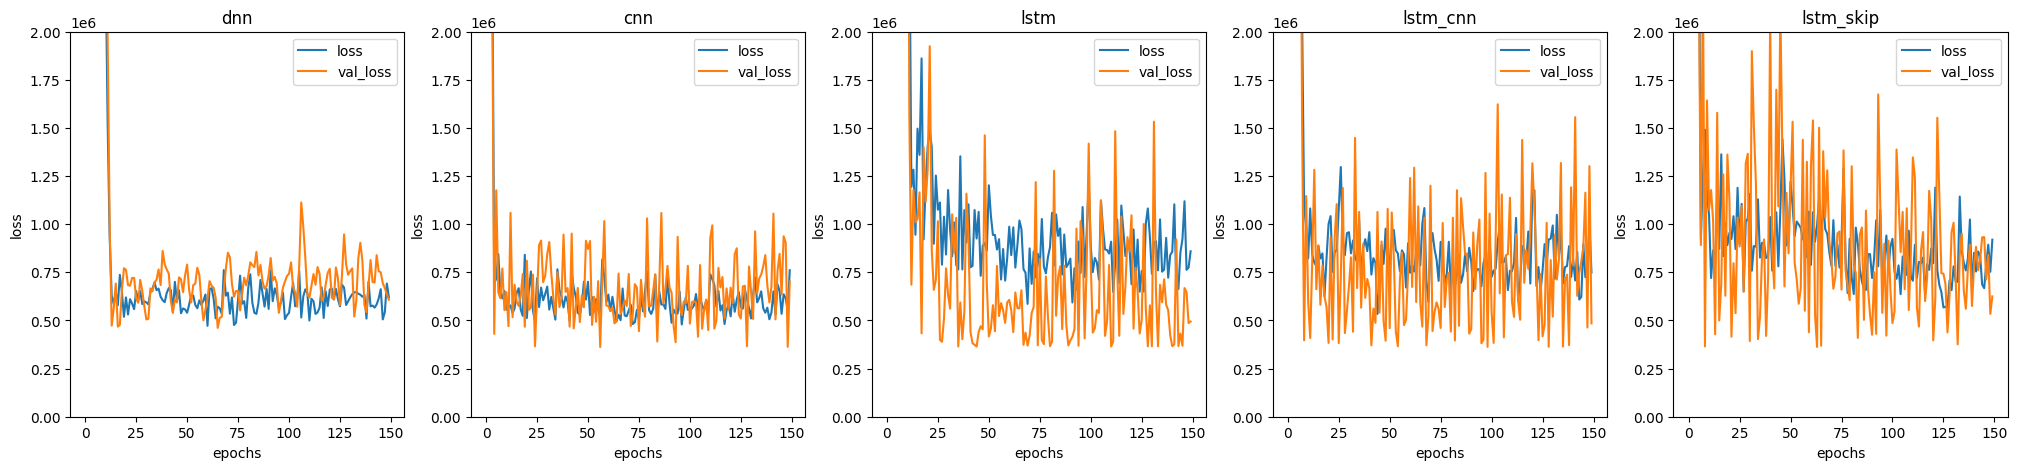

In [ ]:
legend = list()

fig, axs = plt.subplots(1, 5, figsize=(25,5))

def plot_graphs(metric, val, ax, upper):
    ax.plot(val['history'].history[metric])
    ax.plot(val['history'].history[f'val_{metric}'])
    ax.set_title(key)
    ax.legend([metric, f"val_{metric}"])
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.set_ylim([0, upper])

for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('loss', val, ax, 2000000)
print("Loss Curves")

MAE Curves


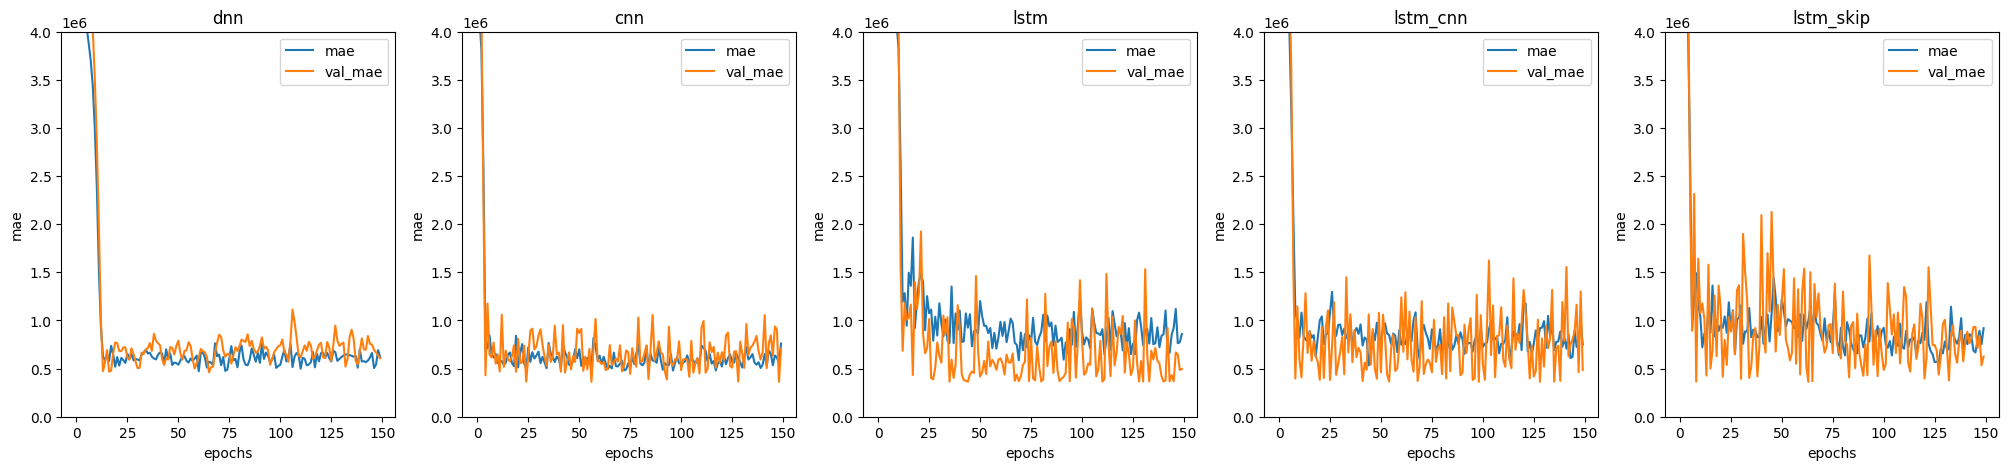

In [ ]:
print("MAE Curves")
fig, axs = plt.subplots(1, 5, figsize=(25,5))
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('mae', val, ax, 4000000)

In [ ]:
names = list()
performance = list()

for key, value in model_configs.items():
  model = value['model']
  # print(value['model'])
  # print(value['test_ds'])
  # print(test_ds)
  mae = model.evaluate(test_ds,batch_size=1)
  performance.append(mae[1])
  performance_df = pd.DataFrame(performance, index=names, columns=['mae'])
  performance_df['error_mw'] = performance_df['mae'] * df['total load forecast'].mean()
  print(performance_df)









4/4 [==============================] - 0s 6ms/step - loss: 489550.1250 - mae: 489550.6250


ValueError: Shape of passed values is (1, 1), indices imply (0, 1)

In [ ]:
value['model'].evaluate?

Object `evaluate` not found.
